# Importing modules

In [1]:
import MetaTrader5 as mt5
import time
import functions as fp

## Connecting to MT5 server

In [2]:
mt5.initialize()

True

## Login to MT5

In [3]:
login = input('Enter your login: ')
password = input('Enter your password: ')
server = input('Enter the server name: ')

if not login:
    login = "SsaliBenjamin"

if not password:
    password = "PRKJRAYr"
    
if not server:
    server = "MetaQuotes-Demo"

# Use a default port value if the user does not provide input
port = input('Enter the server port: ')
if not port:
    port = 8222
else:
    port = int(port)

# Attempt to log in to the server and handle any errors that may occur
try:
    result = mt5.login(login, password, server, port)
    if result == 0:
        print('Successfully logged in')
    else:
        print('Login failed')
except Exception as e:
    print(f'An error occurred while attempting to log in: {e}')

Successfully logged in


## Getting data from high frequency server

In [4]:
# Get data for the past 24hrs
data = fp.fetchPastData(mt5)
# Filter data 
data = fp.filterData(data)
# Calculate EMA, RSI, ATR, and MACD 
data = fp.calcTools(data)
# Store in JSON
data.to_csv('./pastdata.csv', index=False)


## Create and store orders in order book.

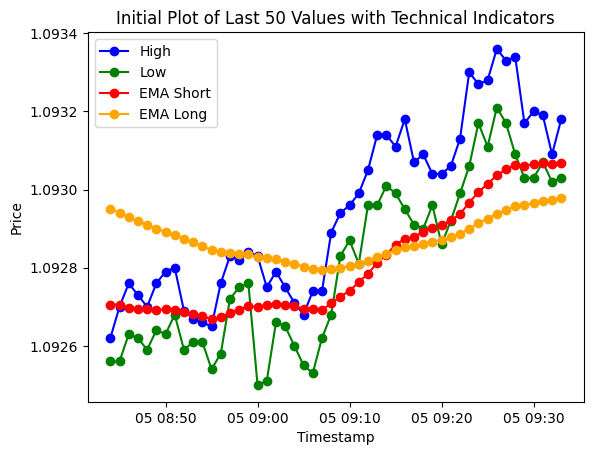

In [5]:
# Visualize trends (Give feedback)
fp.displayTicks(data)
# Use trading strategy
while(True):
    time.sleep(60)
    fp.ticksUpdate()
    fp.someStrategy()
    break
    

## Shutdown MT5.

In [ ]:
mt5.shutdown()